In [11]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Nhóm các hũ
spending_jars = ["NEC", "EDU", "PLAY", "GIVE", "HEALTH", "FAMILY"]
saving_jars   = ["FFA", "LTSS", "DREAM", "EMERGENCY"]
priorities = ["High", "Medium", "Low"]

# Hàm sinh goal
def generate_goal(goal_id: int, user_id: int, jar: str) -> dict:
    start_date = datetime(2025, 7, 1)
    goal_type = "spending" if jar in spending_jars else "saving"

    if goal_type == "spending":
        months = 1
        horizon = "short"
        target_amount = random.randint(1, 5) * 10**6  # 500k – 3 triệu
    else:
        months = random.randint(1, 60)
        horizon = "short" if months <= 12 else "long"
        if horizon == "long":
            # Long: 100tr đến 5 tỷ
            base = random.randint(100, 5000) * 10**6
        else:
            # Short: nhỏ hơn nhiều, 5tr đến 50tr
            base = random.randint(5, 50) * 10**6

        # Hệ số tăng phi tuyến theo thời gian và random độ biến động
        target_amount = int(base * (1 + 0.1 * (months // 6)) * (1 + 0.05 * random.randint(0, 5)))

    target_date = start_date + timedelta(days=30 * months)
    current_saved = random.randint(0, int(target_amount * 0.6))
    completion = round(current_saved / target_amount * 100, 2)

    return {
        "goal_id": goal_id,
        "user_id": user_id,
        "goal_type": goal_type,
        "goal_priority": random.choice(priorities),
        "goal_horizon": horizon,
        "target_amount": target_amount,
        "start_date": start_date.date().isoformat(),
        "target_date": target_date.date().isoformat(),
        "associated_jar": jar,
        "current_saved": current_saved,
        "completion_percent": completion
    }

# Sinh dữ liệu
num_users = 1000
goal_id = 1
all_goals = []

for user_id in range(1, num_users + 1):
    used_saving_jars = random.sample(saving_jars, 2)
    
    # 2 saving goals
    for jar in used_saving_jars:
        all_goals.append(generate_goal(goal_id, user_id, jar))
        goal_id += 1

    # 75% user có thêm 1 spending goal
    if random.random() < 0.75:
        jar_spending = random.choice(spending_jars)
        all_goals.append(generate_goal(goal_id, user_id, jar_spending))
        goal_id += 1

# Xuất file
df = pd.DataFrame(all_goals)
df.to_csv("user_goals_2saving_1spending.csv", index=False, encoding="utf-8-sig")
print(f"✅ Đã sinh {len(df)} goals cho {num_users} người dùng.")


✅ Đã sinh 2743 goals cho 1000 người dùng.


# thống kê

In [12]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("user_goals_2saving_1spending.csv")

# Tổng số goal
total_goals = len(df)

# Tổng số người dùng
total_users = df["user_id"].nunique()

# Thống kê số lượng goal theo loại
goal_type_counts = df["goal_type"].value_counts()

# Thống kê số lượng người có bao nhiêu goals
goals_per_user = df.groupby("user_id")["goal_id"].count().value_counts().sort_index()

# Thống kê theo horizon
horizon_counts = df["goal_horizon"].value_counts()

# Thống kê theo hũ
jar_counts = df["associated_jar"].value_counts()

# Thống kê trung bình số tiền và phần trăm hoàn thành theo loại goal
avg_amount = df.groupby("goal_type")["target_amount"].mean()
avg_completion = df.groupby("goal_type")["completion_percent"].mean()

# Hiển thị
print("📊 Tổng quan thống kê file:")
print(f"- Tổng số goals         : {total_goals}")
print(f"- Số người dùng         : {total_users}\n")

print("📌 Số lượng goal theo loại:")
print(goal_type_counts.to_string(), "\n")

print("📌 Số lượng goals mỗi người:")
for goals, count in goals_per_user.items():
    print(f"- {goals} goals: {count} người")

print("\n📌 Thống kê theo horizon:")
print(horizon_counts.to_string(), "\n")

print("📌 Số lượng theo hũ:")
print(jar_counts.to_string(), "\n")

print("📌 Trung bình số tiền theo loại goal:")
print(avg_amount.round(2).to_string(), "\n")

print("📌 Trung bình % hoàn thành:")
print(avg_completion.round(2).to_string())


📊 Tổng quan thống kê file:
- Tổng số goals         : 2743
- Số người dùng         : 1000

📌 Số lượng goal theo loại:
goal_type
saving      2000
spending     743 

📌 Số lượng goals mỗi người:
- 2 goals: 257 người
- 3 goals: 743 người

📌 Thống kê theo horizon:
goal_horizon
long     1583
short    1160 

📌 Số lượng theo hũ:
associated_jar
DREAM        514
FFA          511
EMERGENCY    497
LTSS         478
NEC          143
FAMILY       133
HEALTH       128
GIVE         125
EDU          115
PLAY          99 

📌 Trung bình số tiền theo loại goal:
goal_type
saving      3.575747e+09
spending    2.952894e+06 

📌 Trung bình % hoàn thành:
goal_type
saving      30.28
spending    29.21


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="goal_type", palette="pastel")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:18: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


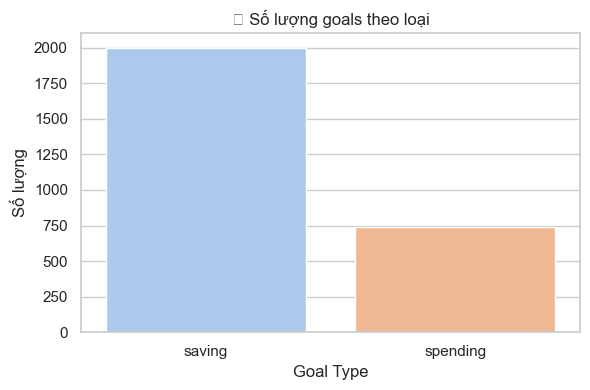

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="goal_horizon", palette="muted")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:28: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


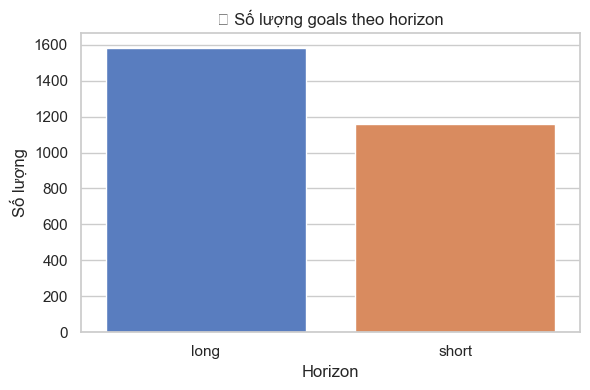

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="associated_jar", order=df["associated_jar"].value_counts().index, palette="Set2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:38: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


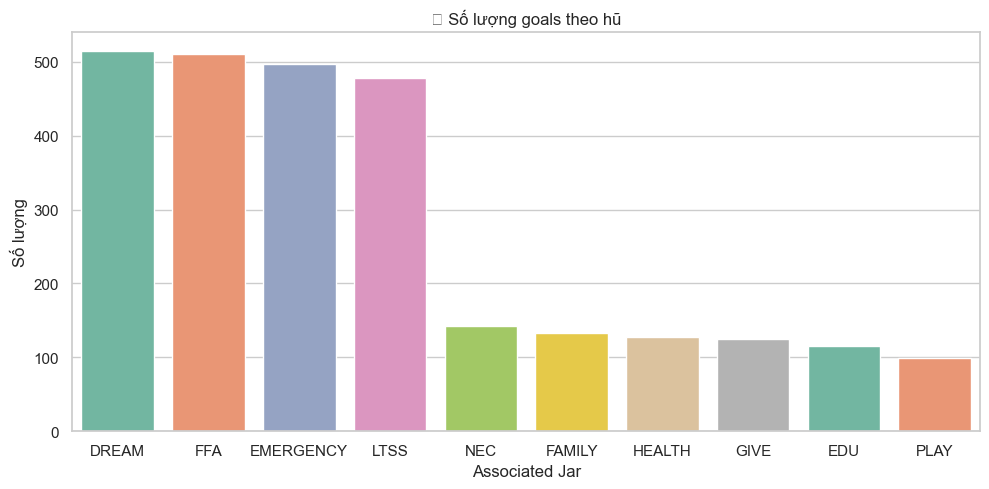

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="goal_type", y="target_amount", palette="coolwarm")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\3569750050.py:48: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


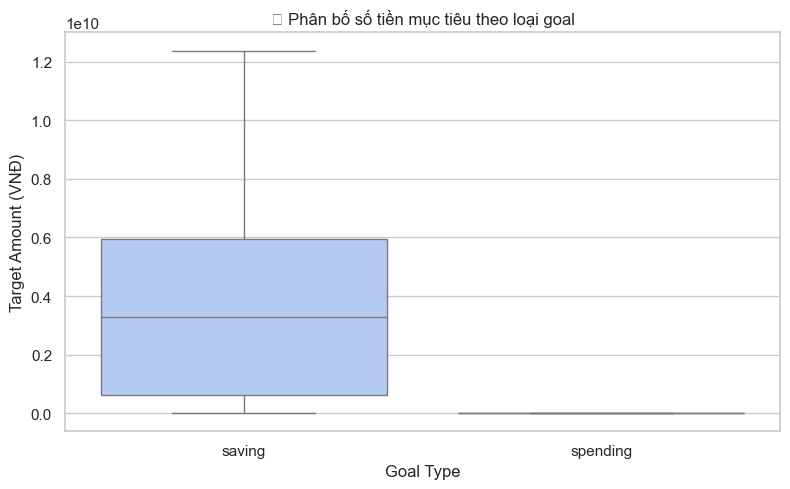

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
df = pd.read_csv("user_goals_2saving_1spending.csv")

# Thiết lập style đẹp
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 10

# ----- Biểu đồ 1: Số lượng goal theo loại (spending / saving) -----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="goal_type", palette="pastel")
plt.title("📌 Số lượng goals theo loại")
plt.xlabel("Goal Type")
plt.ylabel("Số lượng")
plt.tight_layout()
#plt.savefig("goals_by_type.png")
plt.show()

# ----- Biểu đồ 2: Số lượng goal theo goal_horizon -----
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="goal_horizon", palette="muted")
plt.title("📌 Số lượng goals theo horizon")
plt.xlabel("Horizon")
plt.ylabel("Số lượng")
plt.tight_layout()
#plt.savefig("goals_by_horizon.png")
plt.show()

# ----- Biểu đồ 3: Số lượng goals theo hũ (associated_jar) -----
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="associated_jar", order=df["associated_jar"].value_counts().index, palette="Set2")
plt.title("📌 Số lượng goals theo hũ")
plt.xlabel("Associated Jar")
plt.ylabel("Số lượng")
plt.tight_layout()
#plt.savefig("goals_by_jar.png")
plt.show()

# ----- Biểu đồ 4: Phân bố target_amount theo loại goal -----
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="goal_type", y="target_amount", palette="coolwarm")
plt.title("📌 Phân bố số tiền mục tiêu theo loại goal")
plt.xlabel("Goal Type")
plt.ylabel("Target Amount (VNĐ)")
plt.tight_layout()
#plt.savefig("target_amount_distribution.png")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\312468678.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


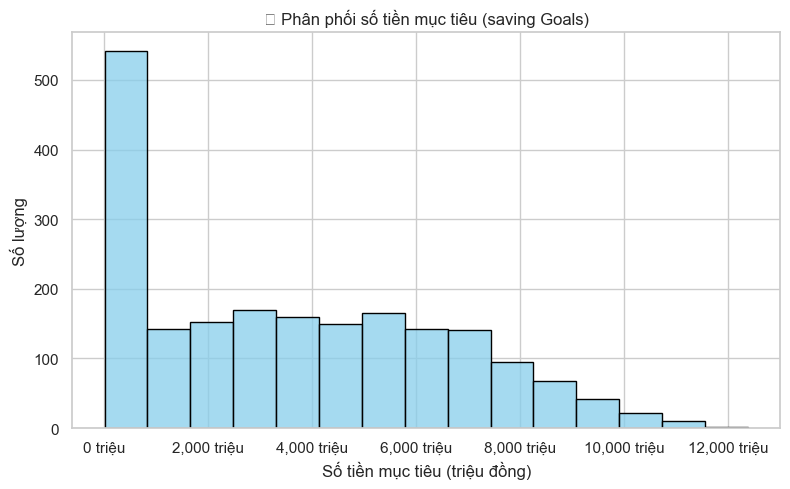

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Đọc file CSV
df = pd.read_csv("user_goals_2saving_1spending.csv")

# Lọc spending
spending_df = df[df["goal_type"] == "saving"].copy()

# Chuyển sang đơn vị triệu đồng
spending_df["target_million"] = spending_df["target_amount"] / 1_000_000

# Vẽ biểu đồ histogram
plt.figure(figsize=(8, 5))
sns.histplot(spending_df["target_million"], bins=15, color="skyblue", edgecolor="black")

plt.title("📊 Phân phối số tiền mục tiêu (saving Goals)")
plt.xlabel("Số tiền mục tiêu (triệu đồng)")
plt.ylabel("Số lượng")
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} triệu'))
plt.tight_layout()
#plt.savefig("spending_target_hist_million.png")
plt.show()
